In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
print("Librerías importadas.")


Librerías importadas.


In [13]:
# Nombre del archivo
archivo_sensores = 'realvibrationdata.csv'

try:
    # Cargamos TODO el archivo CSV
    df_raw = pd.read_csv(archivo_sensores)
    print(f"Archivo '{archivo_sensores}' cargado. Shape inicial: {df_raw.shape}")
except FileNotFoundError:
    print(f"Error: Archivo '{archivo_sensores}' no encontrado.")
    exit() # Salimos si no hay datos

# Exploración inicial rápida
print("\nPrimeras filas (datos crudos):")
print(df_raw.head())
print("\nInfo (datos crudos):")
df_raw.info()

Archivo 'realvibrationdata.csv' cargado. Shape inicial: (1809, 17)

Primeras filas (datos crudos):
       Timestamp  Drillhole_Number Record_Type   Value_X   Value_Y   Value_Z  \
0  1745821456794                 1   GPS_START       NaN       NaN       NaN   
1  1745821456830                 1         ACC -3.650621  6.453274 -6.589255   
2  1745821456830                 1         ACC -3.725569  6.313453 -6.411385   
3  1745821456843                 1         ACC -3.724784  6.284224 -6.607556   
4  1745821456864                 1         ACC -3.682799  6.336006 -6.737408   

   Latitude  Longitude  Duration_s  AvgAccMag  AvgGyroMag   RMSAccZ  \
0       NaN        NaN      10.054    9.77598     0.29154  16.76525   
1       NaN        NaN         NaN        NaN         NaN       NaN   
2       NaN        NaN         NaN        NaN         NaN       NaN   
3       NaN        NaN         NaN        NaN         NaN       NaN   
4       NaN        NaN         NaN        NaN         NaN       N

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
print("Librerías importadas.")

# Nombre del archivo
archivo_sensores = 'realvibrationdata.csv'

try:
    # Cargamos TODO el archivo CSV
    df_raw = pd.read_csv(archivo_sensores)
    print(f"Archivo '{archivo_sensores}' cargado. Shape inicial: {df_raw.shape}")
except FileNotFoundError:
    print(f"Error: Archivo '{archivo_sensores}' no encontrado.")
    exit() # Salimos si no hay datos

# Exploración inicial rápida
print("\nPrimeras filas (datos crudos):")
print(df_raw.head())
print("\nInfo (datos crudos):")
df_raw.info()

In [14]:
print("\nFiltrando registros del Acelerómetro (ACC)...")
# Creamos un nuevo DataFrame solo con filas ACC
# Usamos .copy() para evitar SettingWithCopyWarning más tarde
df_acc = df_raw[df_raw['Record_Type'] == 'ACC'].copy()

print(f"Shape tras filtrar por ACC: {df_acc.shape}")


Filtrando registros del Acelerómetro (ACC)...
Shape tras filtrar por ACC: (906, 17)


In [15]:
# Ahora, convertimos las columnas de valores a numérico
columnas_valores = ['Value_X', 'Value_Y', 'Value_Z']
print(f"\nConvirtiendo columnas {columnas_valores} a numérico...")
for col in columnas_valores:
    # pd.to_numeric convierte. errors='coerce' pone NaN si algo no es número
    df_acc[col] = pd.to_numeric(df_acc[col], errors='coerce')


Convirtiendo columnas ['Value_X', 'Value_Y', 'Value_Z'] a numérico...


In [16]:
# Revisamos info() de nuevo
print("\nInfo (df_acc después de convertir a numérico):")
df_acc.info() # ¡Ahora Value_X/Y/Z deben ser float64!


Info (df_acc después de convertir a numérico):
<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 1 to 1806
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         906 non-null    int64  
 1   Drillhole_Number  906 non-null    int64  
 2   Record_Type       906 non-null    object 
 3   Value_X           906 non-null    float64
 4   Value_Y           906 non-null    float64
 5   Value_Z           906 non-null    float64
 6   Latitude          0 non-null      float64
 7   Longitude         0 non-null      float64
 8   Duration_s        0 non-null      float64
 9   AvgAccMag         0 non-null      float64
 10  AvgGyroMag        0 non-null      float64
 11  RMSAccZ           0 non-null      float64
 12  StdDevAccZ        0 non-null      float64
 13  AvgFFTFreq_Hz     0 non-null      float64
 14  MaxFFTAmp         0 non-null      float64
 15  Hardness          0 non-null      object 
 16  

In [17]:
# Manejamos posibles NaN que se hayan generado en la conversión o que ya existían
print("\nVerificando y eliminando filas con NaN en valores ACC...")
nan_antes = df_acc[columnas_valores].isnull().sum().sum()
df_acc.dropna(subset=columnas_valores, inplace=True) # Elimina filas si HAY NaN en X, Y o Z
nan_despues = df_acc[columnas_valores].isnull().sum().sum()
print(f"  NaN encontrados antes: {nan_antes}, NaN restantes después: {nan_despues}")
print(f"Shape final de df_acc: {df_acc.shape}")

print("\nPrimeras filas del DataFrame de Acelerómetro limpio:")
print(df_acc.head())
print("-" * 30)


Verificando y eliminando filas con NaN en valores ACC...
  NaN encontrados antes: 0, NaN restantes después: 0
Shape final de df_acc: (906, 17)

Primeras filas del DataFrame de Acelerómetro limpio:
       Timestamp  Drillhole_Number Record_Type   Value_X   Value_Y   Value_Z  \
1  1745821456830                 1         ACC -3.650621  6.453274 -6.589255   
2  1745821456830                 1         ACC -3.725569  6.313453 -6.411385   
3  1745821456843                 1         ACC -3.724784  6.284224 -6.607556   
4  1745821456864                 1         ACC -3.682799  6.336006 -6.737408   
6  1745821456883                 1         ACC -3.655438  6.211709 -6.663389   

   Latitude  Longitude  Duration_s  AvgAccMag  AvgGyroMag  RMSAccZ  \
1       NaN        NaN         NaN        NaN         NaN      NaN   
2       NaN        NaN         NaN        NaN         NaN      NaN   
3       NaN        NaN         NaN        NaN         NaN      NaN   
4       NaN        NaN         NaN       

In [ ]:
print("\nFiltrando registros del Acelerómetro (ACC)...")
# Creamos un nuevo DataFrame solo con filas ACC
# Usamos .copy() para evitar SettingWithCopyWarning más tarde
df_acc = df_raw[df_raw['Record_Type'] == 'ACC'].copy()

print(f"Shape tras filtrar por ACC: {df_acc.shape}")

# Ahora, convertimos las columnas de valores a numérico
columnas_valores = ['Value_X', 'Value_Y', 'Value_Z']
print(f"\nConvirtiendo columnas {columnas_valores} a numérico...")
for col in columnas_valores:
    # pd.to_numeric convierte. errors='coerce' pone NaN si algo no es número
    df_acc[col] = pd.to_numeric(df_acc[col], errors='coerce')

# Revisamos info() de nuevo
print("\nInfo (df_acc después de convertir a numérico):")
df_acc.info() # ¡Ahora Value_X/Y/Z deben ser float64!

# Manejamos posibles NaN que se hayan generado en la conversión o que ya existían
print("\nVerificando y eliminando filas con NaN en valores ACC...")
nan_antes = df_acc[columnas_valores].isnull().sum().sum()
df_acc.dropna(subset=columnas_valores, inplace=True) # Elimina filas si HAY NaN en X, Y o Z
nan_despues = df_acc[columnas_valores].isnull().sum().sum()
print(f"  NaN encontrados antes: {nan_antes}, NaN restantes después: {nan_despues}")
print(f"Shape final de df_acc: {df_acc.shape}")

print("\nPrimeras filas del DataFrame de Acelerómetro limpio:")
print(df_acc.head())
print("-" * 30)

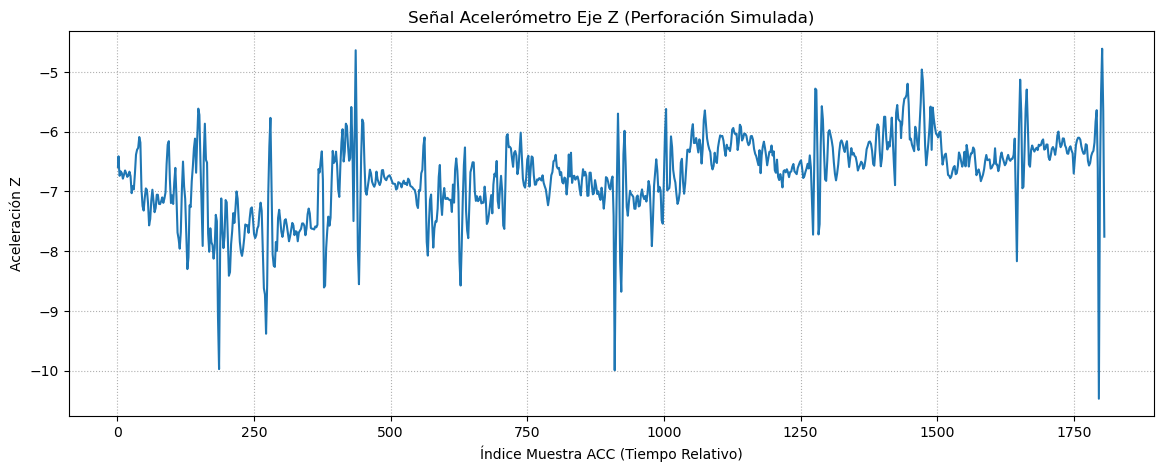

In [18]:
columna_vibracion_z = 'Value_Z'
# Usaremos el índice como eje X relativo al tiempo de las muestras ACC
eje_x_relativo = df_acc.index

plt.figure(figsize=(14, 5)) # Más ancha aún
plt.plot(eje_x_relativo, df_acc[columna_vibracion_z])
plt.title('Señal Acelerómetro Eje Z (Perforación Simulada)')
plt.xlabel('Índice Muestra ACC (Tiempo Relativo)')
plt.ylabel('Aceleración Z')
plt.grid(True, linestyle=':')
plt.show()

In [19]:
print("\nCalculando Magnitud de Aceleración y Std Dev Móvil...")
# Calcular Magnitud: sqrt(X^2 + Y^2 + Z^2)
df_acc['Accel_Mag'] = np.sqrt(
    df_acc['Value_X']**2 +
    df_acc['Value_Y']**2 +
    df_acc['Value_Z']**2
)

# Calcular Desviación Estándar Móvil sobre la Magnitud
window_size = 50 # Una ventana más grande para suavizar
df_acc['Accel_Mag_StdDev'] = df_acc['Accel_Mag'].rolling(window=window_size).std()

print("Cálculos completados. Columnas añadidas: 'Accel_Mag', 'Accel_Mag_StdDev'")
print(df_acc[['Accel_Mag', 'Accel_Mag_StdDev']].head(window_size + 3))
print("-" * 30)


Calculando Magnitud de Aceleración y Std Dev Móvil...
Cálculos completados. Columnas añadidas: 'Accel_Mag', 'Accel_Mag_StdDev'
     Accel_Mag  Accel_Mag_StdDev
1     9.919177               NaN
2     9.738860               NaN
3     9.850142               NaN
4     9.954931               NaN
6     9.815717               NaN
8     9.841568               NaN
10    9.839814               NaN
12    9.840862               NaN
14    9.753735               NaN
16    9.746854               NaN
18    9.789666               NaN
20    9.758510               NaN
22    9.737025               NaN
24    9.801607               NaN
26    9.954629               NaN
28    9.829305               NaN
30    9.909949               NaN
32    9.735427               NaN
34    9.540750               NaN
36    9.444464               NaN
38    9.377812               NaN
40    9.103774               NaN
42    9.037050               NaN
44    9.780568               NaN
46   10.068505               NaN
48   10.056539


Generando gráfico final...


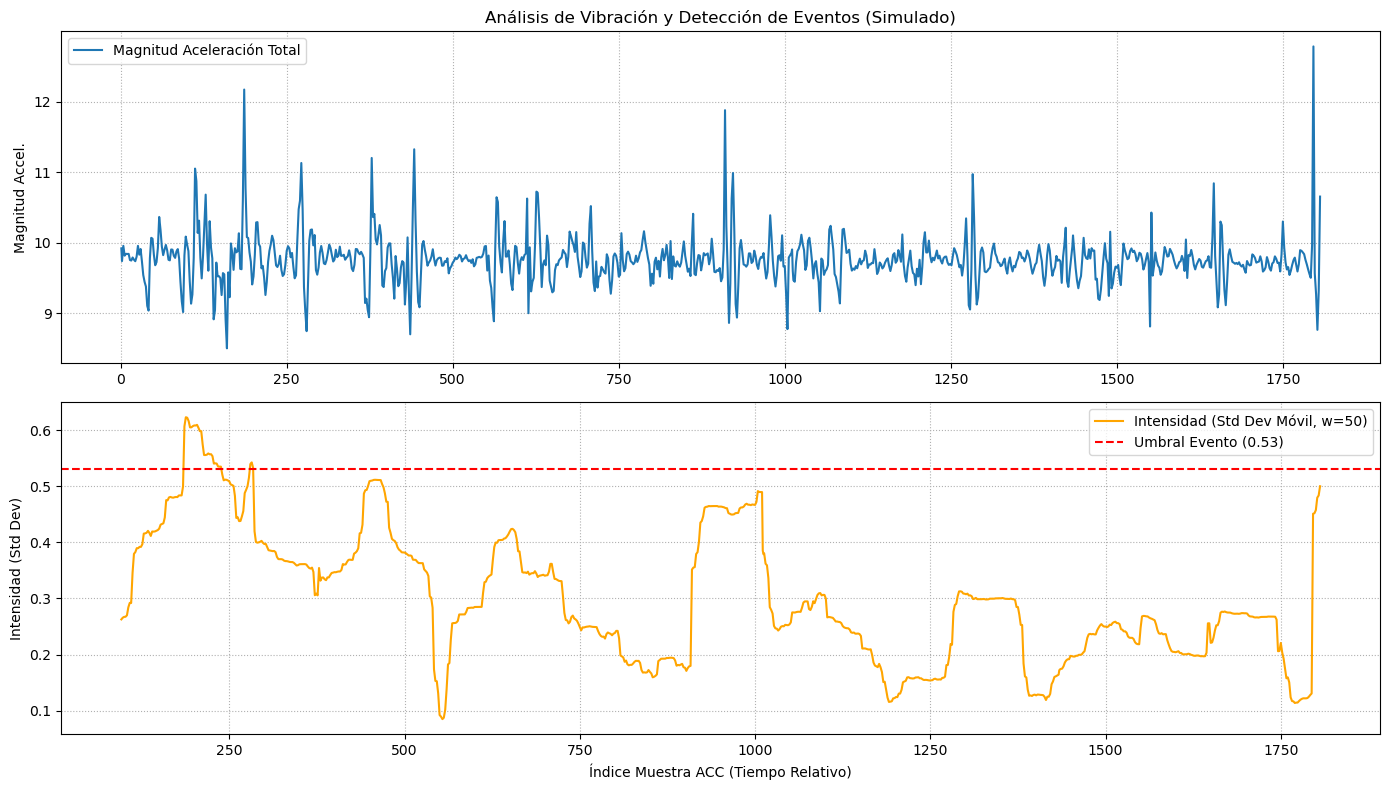

In [20]:
print("\nGenerando gráfico final...")
plt.figure(figsize=(14, 8)) # Figura más alta para dos subplots

# Subplot 1: Magnitud de Aceleración
plt.subplot(2, 1, 1)
plt.plot(eje_x_relativo, df_acc['Accel_Mag'], label='Magnitud Aceleración Total')
plt.title('Análisis de Vibración y Detección de Eventos (Simulado)')
plt.ylabel('Magnitud Accel.')
plt.grid(True, linestyle=':')
plt.legend()

# Subplot 2: Intensidad (Std Dev Móvil) y Umbral
plt.subplot(2, 1, 2)
plt.plot(eje_x_relativo, df_acc['Accel_Mag_StdDev'], label=f'Intensidad (Std Dev Móvil, w={window_size})', color='orange')

# Calculamos un umbral dinámico (ej: media + 2 * std)
media_intensidad = df_acc['Accel_Mag_StdDev'].mean()
std_intensidad = df_acc['Accel_Mag_StdDev'].std()
umbral_evento = media_intensidad + 2.0 * std_intensidad # Umbral a 2 desviaciones estándar
plt.axhline(umbral_evento, color='red', linestyle='--', label=f'Umbral Evento ({umbral_evento:.2f})')

plt.ylabel('Intensidad (Std Dev)')
plt.xlabel('Índice Muestra ACC (Tiempo Relativo)')
plt.grid(True, linestyle=':')
plt.legend()

plt.tight_layout()
plt.show()